<a href="https://colab.research.google.com/github/ewattudo/vis1/blob/main/PS5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Upload Files
Run this for data and setup code. 

## Setup

In [3]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter 
import numpy as np #basic math
from statistics import * #stats

!pip install squarify
import squarify 

!pip install adjustText 
from adjustText import adjust_text

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now: 
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl                                                 

from google.colab import files

#import webbrowser                                                                                                           

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections]) 

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib 
#%matplotlib --list 
#interactive plots:
#%matplotlib notebook  
#static images of your plot:
%matplotlib inline 
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;) 
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('default')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

#wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

import plotly.express as px #a quick simple one
import plotly.graph_objects as go #can get convoluted


ERROR: Operation cancelled by user
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data Upload

### Camden Comparison

In [4]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/CompReports.csv", "comps")

('comps', <http.client.HTTPMessage at 0x7f958a299790>)

In [5]:
os.getcwd() #pwd
os.listdir() #compare to clicking on the left the folder icon #dir

'/content'

['.config', 'programs', 'comps', 'sample_data']

In [6]:
comps=pd.read_csv('comps')

### Rutgers Comparison

In [7]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/CampCompReports.csv", "campcomps")

('campcomps', <http.client.HTTPMessage at 0x7f958a266d60>)

In [8]:
campcomps=pd.read_csv('campcomps')

### Program Pipeline

In [9]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/ProgramDetails.csv", "programs")

('programs', <http.client.HTTPMessage at 0x7f958a2992b0>)

In [10]:
programs=pd.read_csv('programs')

### Year Over Year Data

In [11]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/YoYCompReports.csv", "yoy")

('yoy', <http.client.HTTPMessage at 0x7f958a266dc0>)

In [12]:
yoy=pd.read_csv('yoy')

### Fall 2023 Application Data

In [13]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/Fall23AppData.csv", "fallapps")

('fallapps', <http.client.HTTPMessage at 0x7f958a266f70>)

In [14]:
fall=pd.read_csv('fallapps')

In [15]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/race.csv", "race")

('race', <http.client.HTTPMessage at 0x7f95c026bcd0>)

In [16]:
race=pd.read_csv('race')

### Names

In [17]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/Names.csv", "namel")

('namel', <http.client.HTTPMessage at 0x7f95c026b430>)

In [18]:
namel=pd.read_csv('namel')
namel.head(3)

,LastName
0,Manduri
1,Schwartz
2,Olorunseyi


# Graduate Admissions Dashboard

This project was designed to tell the story of graduate admissions on the Camden campus for fall 2023. It is split into two sections:

1.   Comparing the graduate performance
2.   Identifying who has applied




## Comparing the Number of Commits
 Against Camden and Against Rutgers Graduate Schools 

1.   Year Over Year
2.   Camden
3. Rutgers Graduate 

###Year over Year

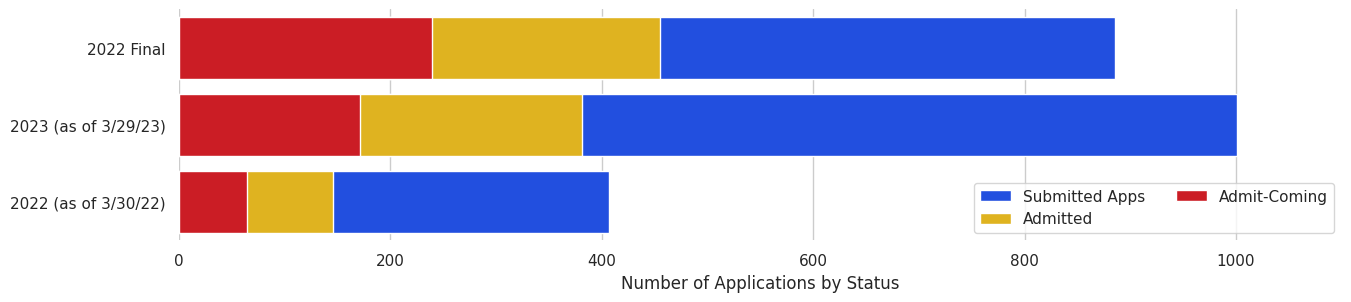

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 3))

# Plot the total apps
sns.set_color_codes("bright")
sns.barplot(x="Submitted", y="Year", data=yoy,
            label="Submitted Apps", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("bright")
sns.barplot(x="Admitted", y="Year", data=yoy,
            label="Admitted", color="y")

# Plot the crashes where alcohol was involved
sns.set_color_codes("bright")
sns.barplot(x="Admit-Coming", y="Year", data=yoy,
            label="Admit-Coming", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1100), ylabel="",
       xlabel="Number of Applications by Status")
sns.despine(left=True, bottom=True);

The graduate school is experiencing unprecedented growth in the number of applications. As of March 4, we have nearly as many submitted applications as we had for the entirety of the fall 2022 cycle. 

It should be noted that it is very early in the recruitment cycle and the numbers reported here are leading indicators to matriculation. 

###Camden

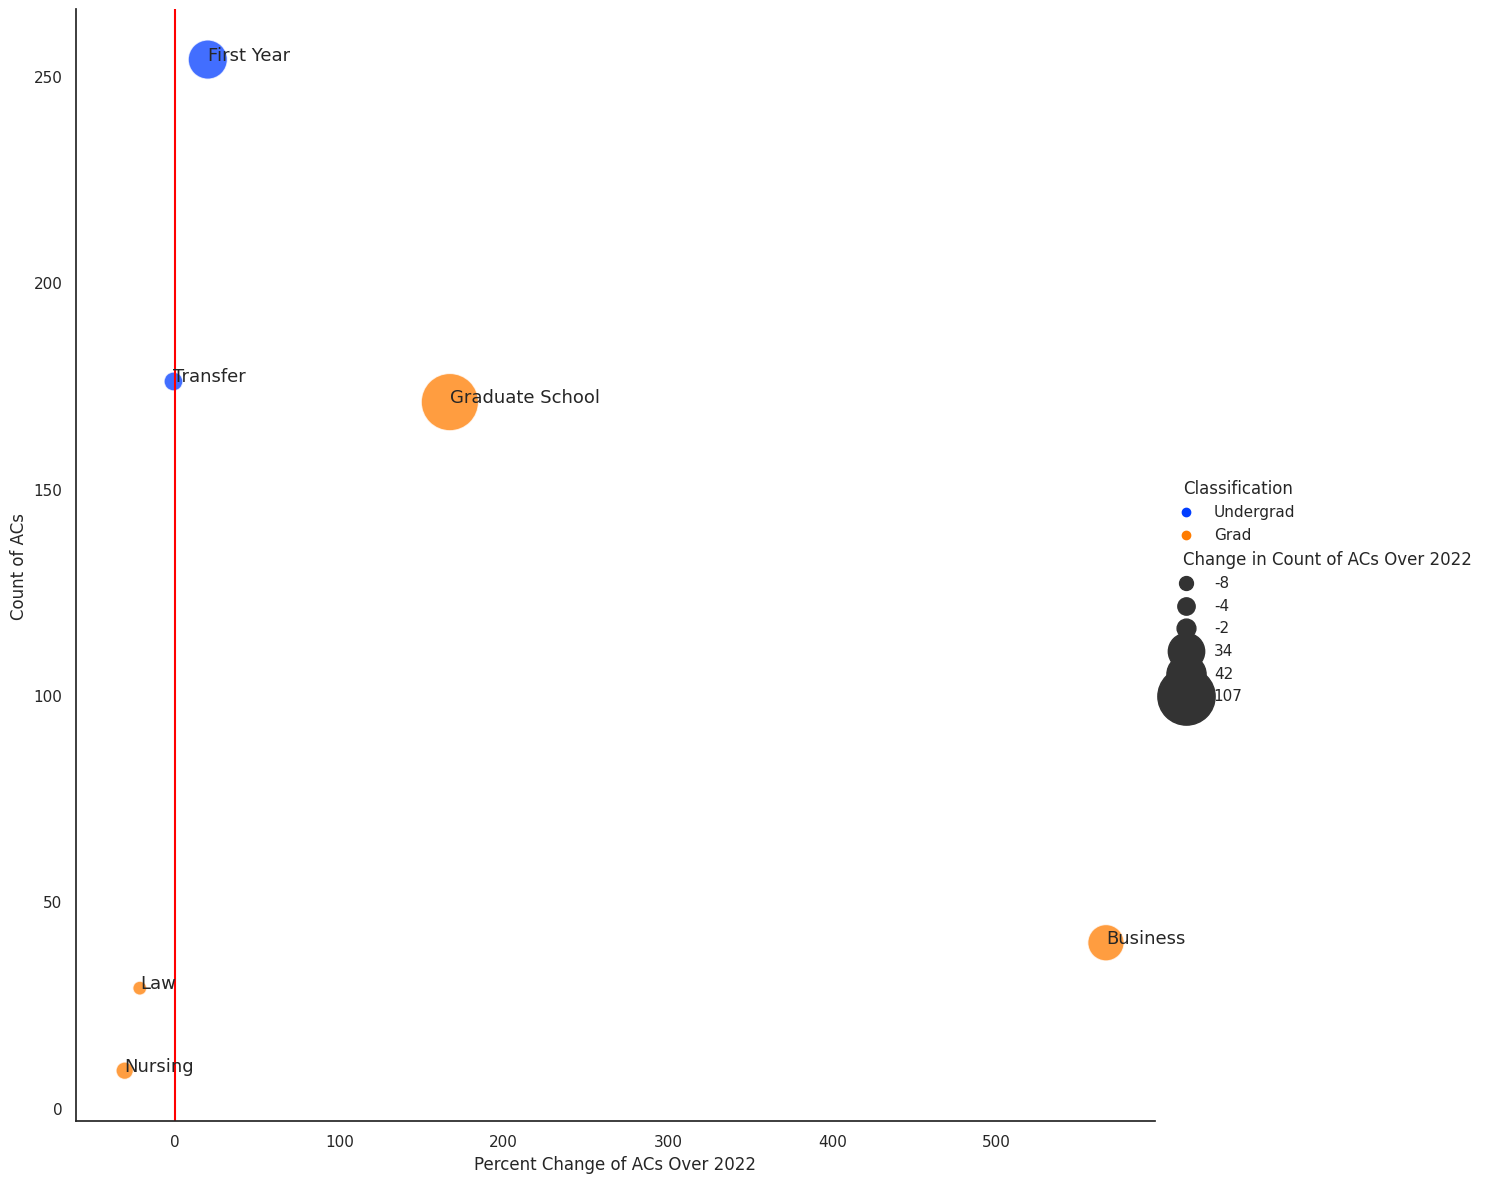

In [20]:
from numpy.ma.core import compress
import seaborn as sns
sns.set_theme(style="white")

# Plot miles 
sns.relplot(y="Count of ACs", x="Percent Change of ACs Over 2022", 
            hue="Classification", size="Change in Count of ACs Over 2022",
            sizes=(100, 1700), alpha=.75,palette="bright",
            height=12, data=comps)
plt.axvline(x = 0, color = 'red',)

texts = [plt.text(comps['Percent Change of ACs Over 2022'][i],
                  comps['Count of ACs'][i], comps['Category'][i],fontsize=13) 
for i in range(len(comps))]


This graph compares Graduate the number of accepted students across different groups on the Camden campus. The Graduate School has more accepted students than three other schools combined. 

### Rutgers (Grad Only)

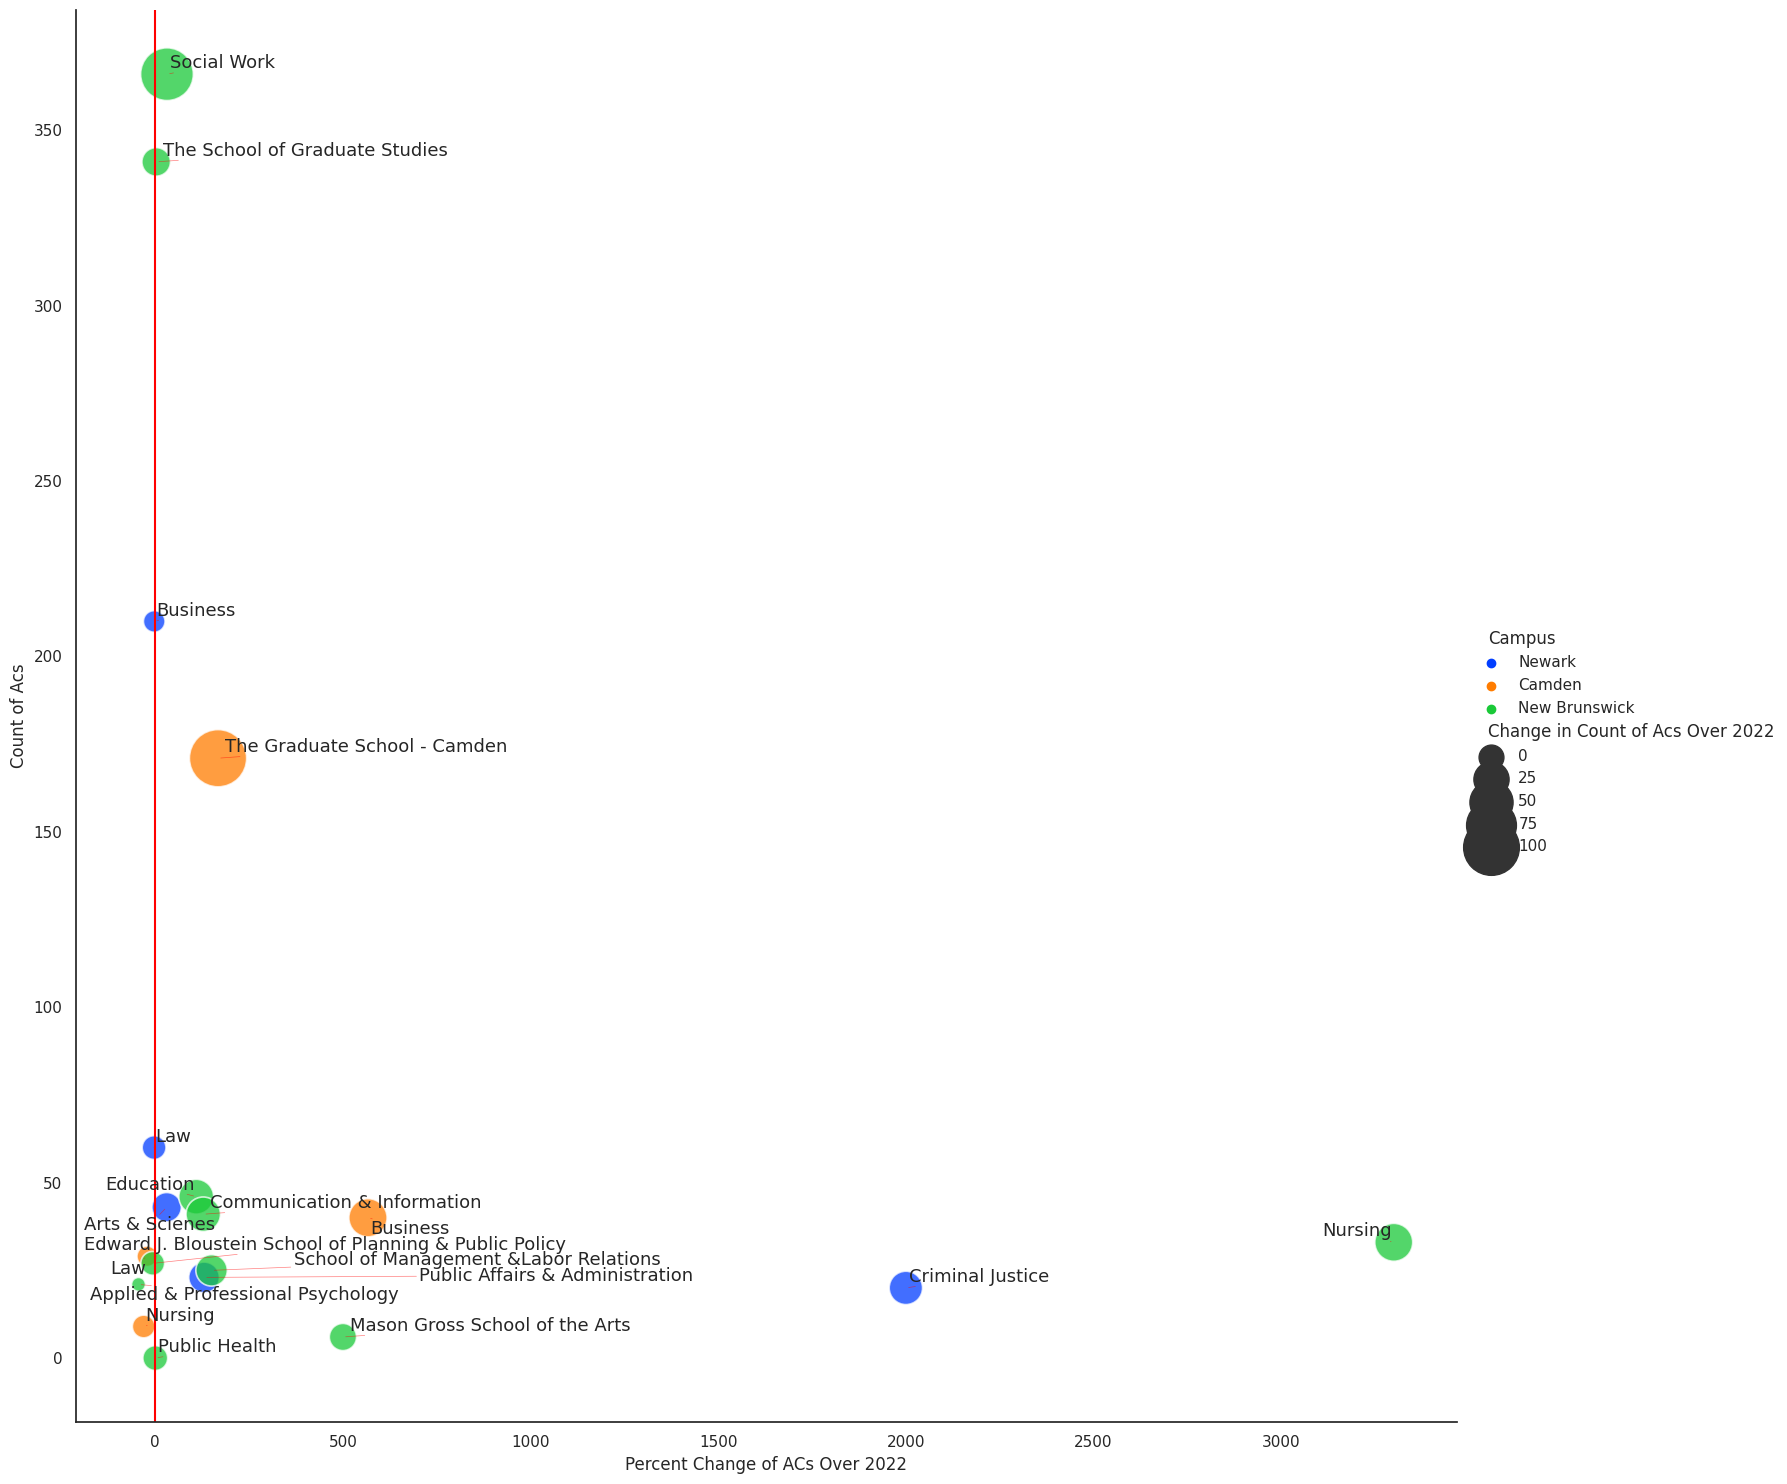

In [21]:
from numpy.ma.core import compress
import seaborn as sns
sns.set_theme(style="white")
# Plot miles

sns.relplot(y="Count of Acs", x="Percent Change of ACs Over 2022", 
            hue="Campus", size="Change in Count of Acs Over 2022",
            sizes=(100, 1700), alpha=.75,palette="bright",
            height=15, data=campcomps)
plt.axvline(x = 0, color = 'red',)

texts = [plt.text(campcomps['Percent Change of ACs Over 2022'][i],
                  campcomps['Count of Acs'][i], campcomps['School'][i],fontsize=13) 
for i in range(len(campcomps))] 
adjust_text(texts,arrowprops=dict(arrowstyle='-', color='red', alpha=.5,lw=.5));

In [ ]:
fig = px.scatter(campcomps, x="Percent Change of ACs Over 2022", y="Count of Acs",symbol='foreign', color="Classification",
                 size='headroom', hover_data=['make'],width=1000,height=600)
fig.update_layout(legend=dict(yanchor="top",xanchor="right"),
    title_text = 'scatter plot showing 5vars and make on hover')

THis graph compares graduate school perfonace across all campuses, the Graduate School has the highest growth rate of any of the top five schools. 

## Who Applied 

This section provides an analysis of who has has applied this cycle. 

###Age by Program

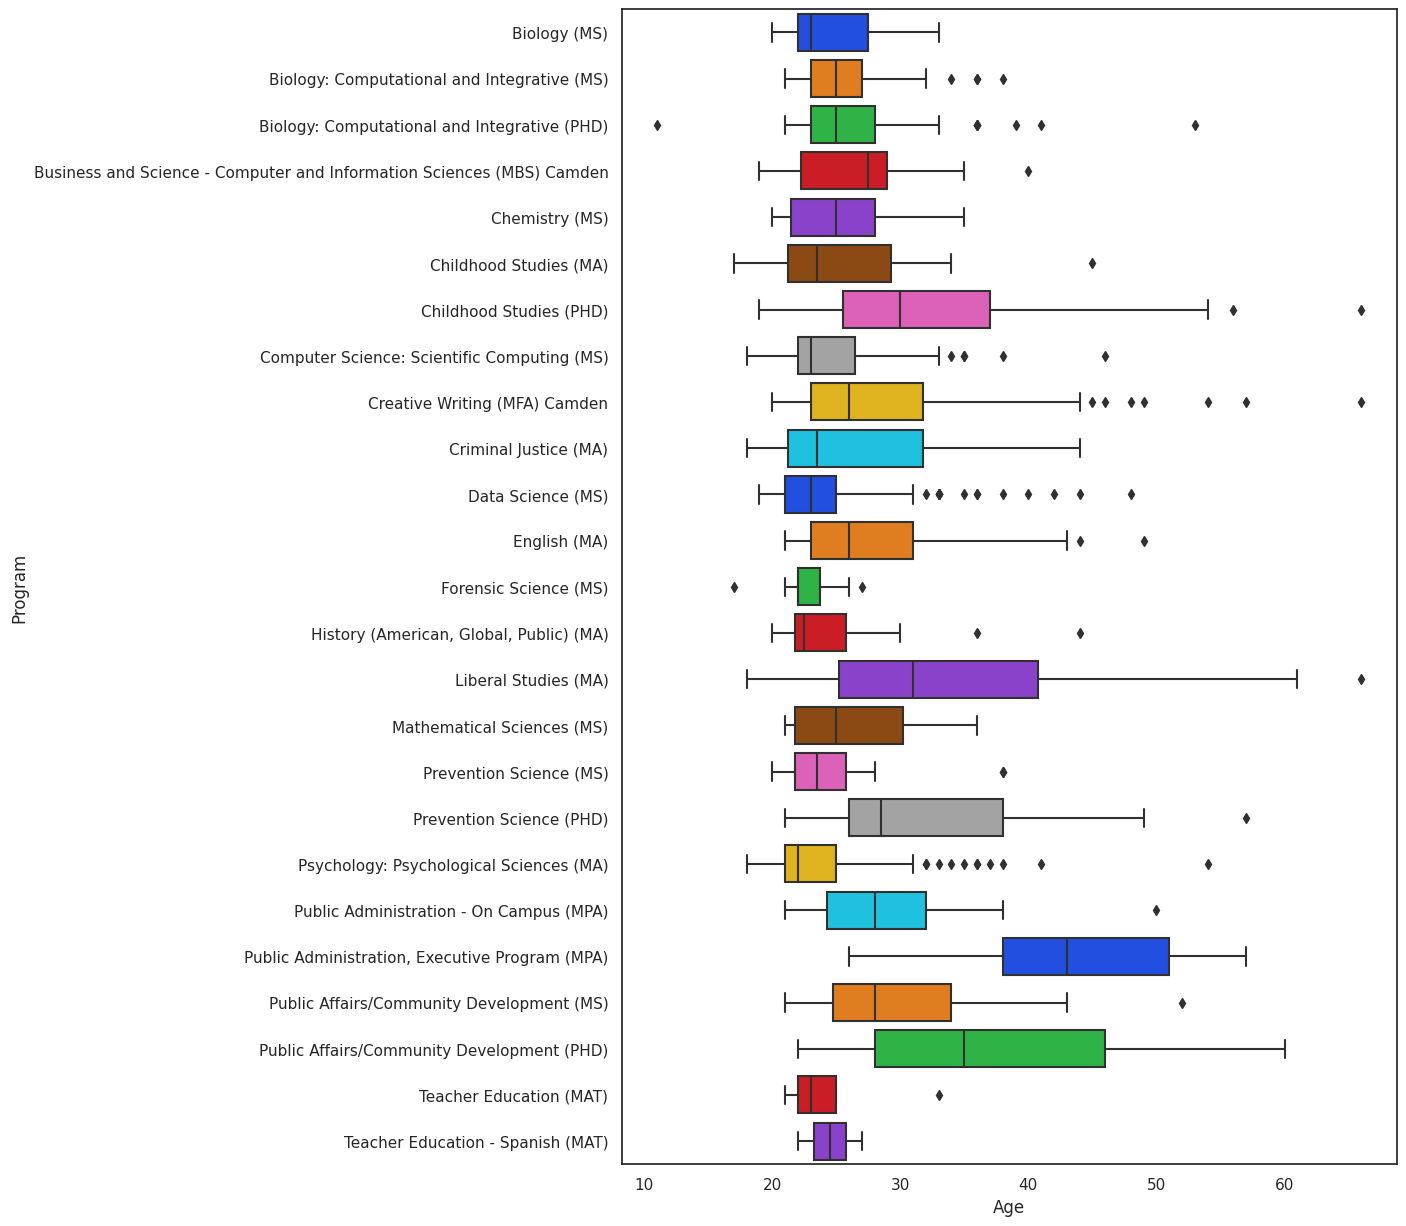

In [22]:
fig, ax = plt.subplots(figsize=(10, 15))

import seaborn as sns
sns.set_theme(style="whitegrid")

my_order = fall.groupby(by=["Program"])["Age"].median('Age').iloc[::1].index
 
sns.boxplot(x='Age', y='Program', palette="bright", data=fall, order=my_order);

This is a great case for disaggregation of data. The EMPA figure is not surprising but the Data Science and Public Affairs numbers certainly are. 

### Gender by Program

0 Gender
Female    0.545455
Male      0.454545
Name: 0, dtype: float64


Text(0.2727272727272727, 0, '54 %')

Text(0.7727272727272727, 0, '45 %')

1 Gender
Female    0.56
Male      0.44
Name: 1, dtype: float64


Text(0.28, 1, '56 %')

Text(0.78, 1, '44 %')

2 Gender
Female    0.452055
Male      0.547945
Name: 2, dtype: float64


Text(0.22602739726027396, 2, '45 %')

Text(0.726027397260274, 2, '54 %')

3 Gender
Female    0.428571
Male      0.571429
Name: 3, dtype: float64


Text(0.21428571428571427, 3, '42 %')

Text(0.7142857142857142, 3, '57 %')

4 Gender
Female    0.466667
Male      0.533333
Name: 4, dtype: float64


Text(0.23333333333333334, 4, '46 %')

Text(0.7333333333333334, 4, '53 %')

5 Gender
Female    0.857143
Male      0.142857
Name: 5, dtype: float64


Text(0.42857142857142855, 5, '85 %')

Text(0.9285714285714285, 5, '14 %')

6 Gender
Female    0.846154
Male      0.153846
Name: 6, dtype: float64


Text(0.4230769230769231, 6, '84 %')

Text(0.9230769230769231, 6, '15 %')

7 Gender
Female    0.362637
Male      0.637363
Name: 7, dtype: float64


Text(0.1813186813186813, 7, '36 %')

Text(0.6813186813186813, 7, '63 %')

8 Gender
Female    0.644928
Male      0.355072
Name: 8, dtype: float64


Text(0.322463768115942, 8, '64 %')

Text(0.822463768115942, 8, '35 %')

9 Gender
Female    0.538462
Male      0.461538
Name: 9, dtype: float64


Text(0.2692307692307692, 9, '53 %')

Text(0.7692307692307692, 9, '46 %')

10 Gender
Female    0.311295
Male      0.688705
Name: 10, dtype: float64


Text(0.15564738292011018, 10, '31 %')

Text(0.6556473829201102, 10, '68 %')

11 Gender
Female    0.432432
Male      0.567568
Name: 11, dtype: float64


Text(0.21621621621621623, 11, '43 %')

Text(0.7162162162162162, 11, '56 %')

12 Gender
Female    0.681818
Male      0.318182
Name: 12, dtype: float64


Text(0.3409090909090909, 12, '68 %')

Text(0.8409090909090908, 12, '31 %')

13 Gender
Female    0.75
Male      0.25
Name: 13, dtype: float64


Text(0.375, 13, '75 %')

Text(0.875, 13, '25 %')

14 Gender
Female    0.785714
Male      0.214286
Name: 14, dtype: float64


Text(0.39285714285714285, 14, '78 %')

Text(0.8928571428571428, 14, '21 %')

15 Gender
Female    0.5
Male      0.5
Name: 15, dtype: float64


Text(0.25, 15, '50 %')

Text(0.75, 15, '50 %')

16 Gender
Female    0.916667
Male      0.083333
Name: 16, dtype: float64


Text(0.4583333333333333, 16, '91 %')

17 Gender
Female    0.73913
Male      0.26087
Name: 17, dtype: float64


Text(0.3695652173913043, 17, '73 %')

Text(0.8695652173913043, 17, '26 %')

18 Gender
Female    0.80315
Male      0.19685
Name: 18, dtype: float64


Text(0.4015748031496063, 18, '80 %')

Text(0.9015748031496064, 18, '19 %')

19 Gender
Female    0.433333
Male      0.566667
Name: 19, dtype: float64


Text(0.21666666666666667, 19, '43 %')

Text(0.7166666666666667, 19, '56 %')

20 Gender
Female    0.461538
Male      0.538462
Name: 20, dtype: float64


Text(0.23076923076923078, 20, '46 %')

Text(0.7307692307692308, 20, '53 %')

21 Gender
Female    0.583333
Male      0.416667
Name: 21, dtype: float64


Text(0.2916666666666667, 21, '58 %')

Text(0.7916666666666667, 21, '41 %')

22 Gender
Female    0.666667
Male      0.333333
Name: 22, dtype: float64


Text(0.3333333333333333, 22, '66 %')

Text(0.8333333333333333, 22, '33 %')

23 Gender
Female    0.625
Male      0.375
Name: 23, dtype: float64


Text(0.3125, 23, '62 %')

Text(0.8125, 23, '37 %')

24 Gender
Female    1.0
Male      NaN
Name: 24, dtype: float64


Text(0.5, 24, '100 %')

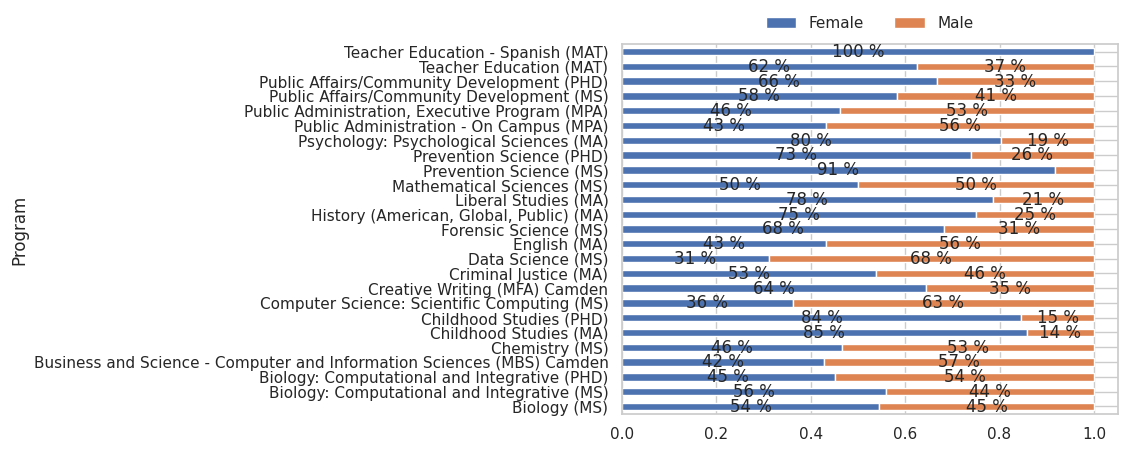

In [23]:
_var, y_var = "Program", "Gender"
fall_grouped = fall.groupby("Program")["Gender"].value_counts(normalize=True).unstack(y_var)
fall_grouped.plot.barh(stacked=True).figsize=(25,25)
plt.legend(
        bbox_to_anchor=(0.5, 1.02),
        loc="lower center",
        borderaxespad=0,
        frameon=False,
        ncol=3,
    )
for ix, row in fall_grouped.reset_index(drop=True).iterrows():
        print(ix, row)
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element * 100)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element;

### Home Country and State

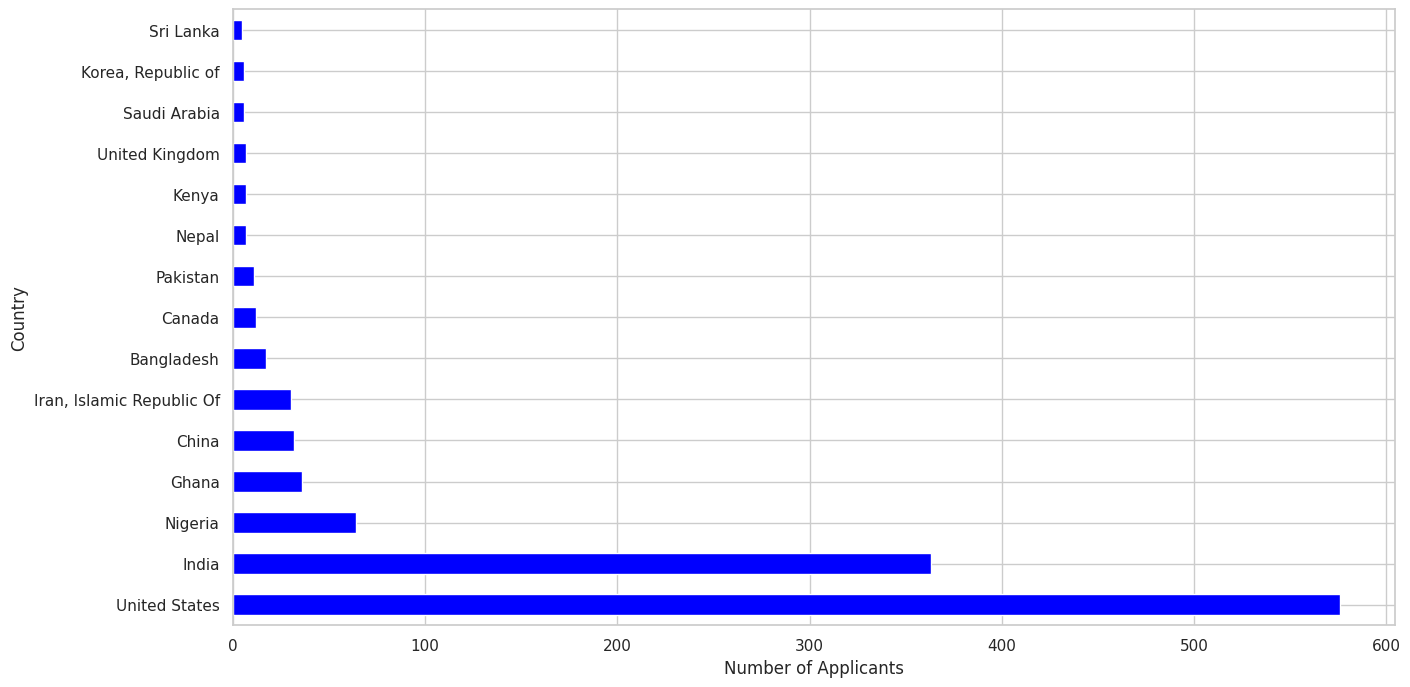

In [24]:
fall.Country.value_counts().nlargest(15).plot(kind='barh',figsize=(15,8), color='blue')
plt.ylabel("Country")
plt.xlabel("Number of Applicants");

<Axes: >

Text(0, 0.5, 'State or Province')

Text(0.5, 0, 'Number of Applicants')

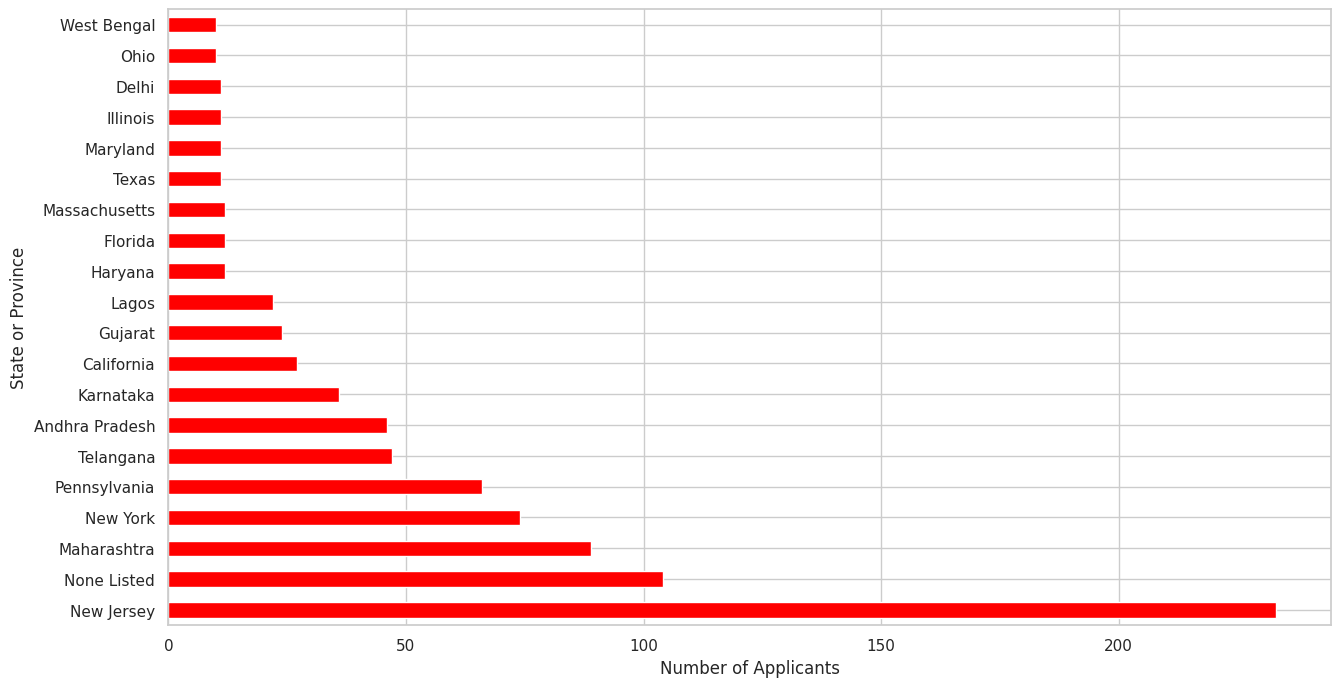

In [25]:
fall.State.value_counts().nlargest(20).plot(kind='barh',figsize=(15,8), color='red')
plt.ylabel("State or Province")
plt.xlabel("Number of Applicants")

The lack of success in Pennsylvania continues to surprise me. 

### Race by Program

In [26]:
race[:].style.background_gradient(cmap="RdYlGn")

,Race,Total,Biology (MS),Biology: Computational and Integrative (MS),Biology: Computational and Integrative (PHD),Business and Science - Computer and Information Sciences (MBS) Camden,Chemistry (MS),Childhood Studies (MA),Childhood Studies (PHD),Computer Science: Scientific Computing (MS),Creative Writing (MFA) Camden,Criminal Justice (MA),Data Science (MS),English (MA),Forensic Science (MS),"History (American, Global, Public) (MA)",Liberal Studies (MA),Mathematical Sciences (MS),Prevention Science (MS),Prevention Science (PHD),Psychology: Psychological Sciences (MA),Public Administration - On Campus (MPA),"Public Administration, Executive Program (West Windsor, Saturday Morning) (MPA)",Public Affairs/Community Development (MS),Public Affairs/Community Development (PHD),Teacher Education - Spanish (MAT),Teacher Education (MAT),Grand Total
0,Asian,559,15,22,25,8,10,2,10,66,15,5,304,9,3,0,2,4,3,8,31,3,2,6,6,0,0,559
1,White,337,10,10,23,2,2,6,11,5,79,8,11,13,8,17,11,2,2,19,56,14,4,10,6,0,8,337
2,Black or African American,237,5,11,15,4,7,5,11,15,19,9,23,13,7,3,3,1,5,16,22,13,6,10,11,1,2,237
3,None Listed,71,2,6,5,0,1,0,1,6,10,0,27,3,0,1,0,1,0,2,3,0,1,0,2,0,0,71
4,Two or More,51,0,0,4,0,1,2,3,1,11,1,5,1,2,1,1,0,1,2,11,0,1,0,2,1,0,51
5,Hispanic or Latino,28,1,0,1,0,0,1,2,1,4,6,0,2,2,0,0,0,1,0,7,0,0,0,0,0,0,28
6,American Indian or Alaska Native,3,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3
7,Other,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


NameError: ignored

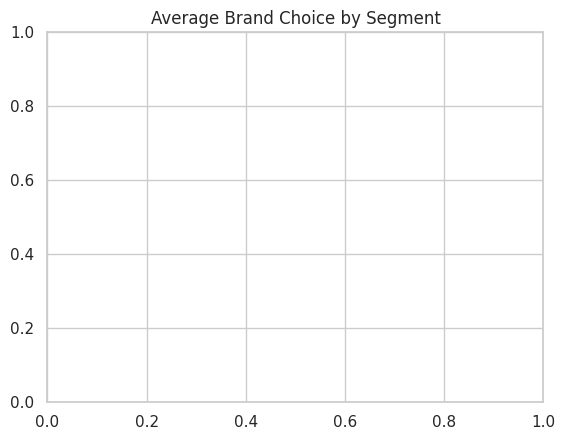

In [27]:
#keep this for later 
# because we are visualizing proportions, our data variates between 0 and 1
plt.title('Average Brand Choice by Segment')
sns.heatmap(mean_brand_choice, vmin=0, vmax=1, annot=True, cmap='PuBu')
plt.yticks(mean_brand_choice.index, ['Standard', 'Career-Focused', 'Fewer Opportunities', 'Well-Off'], 
           rotation=45, fontsize=9);

In [ ]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
# Create a list of word
text=("Shah Shah Shah Shah Shah Shah Shah Shah Shah Shah Shah Shah Jain Jain Jain Jain Jain Jain Jain Jain Sharma Sharma Sharma Sharma	Sharma Sharma Sharma Joshi Joshi Joshi Joshi Joshi Joshi Joshi Li Li Li	Li Li Li Wang Wang Wang	Wang Wang Patel	Patel Patel Patel Patel	Mohammed Mohammed Mohammed Mohammed Mohammed Kumar Kumar Kumar Kumar Kumar Singh Singh Singh Singh Singh Brown Brown Brown Brown Brown")
 
# Create the wordcloud object
wordcloud = WordCloud(max_font_size=50, max_words=12, background_color="white").generate(text)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
# Create a list of word
text = " ".join(cat for cat in namel.LastName)
 
# Create the wordcloud object
wordcloud = WordCloud(width=7500, height=5000, max_font_size=10000, max_words=100, background_color="white",colormap="tab10").generate(text)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()
plt.savefig('wordcloud.pdf')

##Reviewing Pipeline by Program to Determine Next Steps

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Make the PairGrid
g = sns.PairGrid(programs.sort_values("Admit-Coming", ascending=False),
                 x_vars=programs.columns[:-1], y_vars=["Program"],
                 height=15, aspect=.18)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=15, orient="h", jitter=False,
      palette="bright", linewidth=1, edgecolor="w")

# Use semantically meaningful titles for the columns
titles = ['Total','Unsubmitted', 'Incomplete', 'Admit', 'Under Review',
       'Admit-Coming', 'Not Coming (Fall)']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True);

This is the graph that I will use to make decsions on next steps. 